<a href="https://colab.research.google.com/github/AG-2002/Credit_Card_Fraud_Detection/blob/main/Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection (Classification): Predict if a transaction is fraudulent.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
# Load CSV with pandas

df=pd.read_csv('credit_card_transactions.csv')
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df[df.duplicated(keep=False)]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [8]:
# Check class balance of the target (fraud vs not fraud)

df.iloc[:, -2].value_counts()

,count
is_fraud,
0,1289169
1,7506


# Data Preprocessing

In [9]:
df = df.drop(columns=['merch_zipcode'])

In [82]:
'''df = df.dropna()

print("DataFrame after dropping rows with all missing values: ")
print(df)'''

'df = df.dropna()\n\nprint("DataFrame after dropping rows with all missing values: ")\nprint(df)'

In [10]:
# CALCULATING THE AGE OF THE MERCHANTS FROM DOB AND TRANSANCTION YEAR

df['customer_birth_year'] = pd.DatetimeIndex(df['dob']).year
df['transaction_year'] = pd.DatetimeIndex(df['trans_date_trans_time']).year
df['transaction_month'] = pd.DatetimeIndex(df['trans_date_trans_time']).month_name()
df['transaction_day'] = pd.DatetimeIndex(df['trans_date_trans_time']).day
df['transaction_hour'] = pd.DatetimeIndex(df['trans_date_trans_time']).hour
df['transaction_day_name'] = pd.DatetimeIndex(df['trans_date_trans_time']).day_name()
df['age_of_customer_on_transaction_year'] = df['transaction_year']-df['customer_birth_year']

print(df)

         Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.

In [11]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'customer_birth_year',
       'transaction_year', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_day_name',
       'age_of_customer_on_transaction_year'],
      dtype='object')

In [12]:
df = df.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','zip','merchant','street','lat', 'long','dob', 'trans_num', 'unix_time','merch_lat', 'merch_long',
       'customer_birth_year','transaction_day', 'transaction_hour', 'city','transaction_day_name','first', 'last'])

print("DataFrame with only numeric columns:")
print(df)
df.columns

DataFrame with only numeric columns:
              category     amt gender state  city_pop  \
0             misc_net    4.97      F    NC      3495   
1          grocery_pos  107.23      F    WA       149   
2        entertainment  220.11      M    ID      4154   
3        gas_transport   45.00      M    MT      1939   
4             misc_pos   41.96      M    VA        99   
...                ...     ...    ...   ...       ...   
1296670  entertainment   15.56      M    UT       258   
1296671    food_dining   51.70      M    MD       100   
1296672    food_dining  105.93      M    NM       899   
1296673    food_dining   74.90      M    SD      1126   
1296674    food_dining    4.30      M    MT       218   

                                       job  is_fraud  transaction_year  \
0                Psychologist, counselling         0              2019   
1        Special educational needs teacher         0              2019   
2              Nature conservation officer         0    

Index(['category', 'amt', 'gender', 'state', 'city_pop', 'job', 'is_fraud',
       'transaction_year', 'transaction_month',
       'age_of_customer_on_transaction_year'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   category                             1296675 non-null  object 
 1   amt                                  1296675 non-null  float64
 2   gender                               1296675 non-null  object 
 3   state                                1296675 non-null  object 
 4   city_pop                             1296675 non-null  int64  
 5   job                                  1296675 non-null  object 
 6   is_fraud                             1296675 non-null  int64  
 7   transaction_year                     1296675 non-null  int32  
 8   transaction_month                    1296675 non-null  object 
 9   age_of_customer_on_transaction_year  1296675 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 89.0+ M

In [14]:
from scipy.stats import zscore

# Select continuous predictors (update if needed)
continuous_cols = ['amt','city_pop','transaction_year','age_of_customer_on_transaction_year']

# 1. Detect outliers using Z-score method
z_scores = df[continuous_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3)
outlier_counts_z = outliers_z.sum().sort_values(ascending=False)

print("Z-Score Based Outliers (|z| > 3):")
print(outlier_counts_z)

# 2. Detect outliers using IQR method
outlier_counts_iqr = {}

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_counts_iqr[col] = count

print("\nIQR Based Outliers:")
print(pd.Series(outlier_counts_iqr).sort_values(ascending=False))

Z-Score Based Outliers (|z| > 3):
city_pop                               32814
amt                                    12738
transaction_year                           0
age_of_customer_on_transaction_year        0
dtype: int64

IQR Based Outliers:
city_pop                               242674
amt                                     67290
age_of_customer_on_transaction_year      2258
transaction_year                            0
dtype: int64


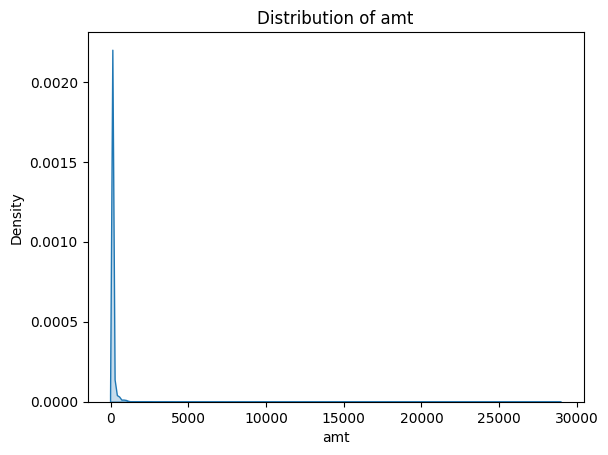

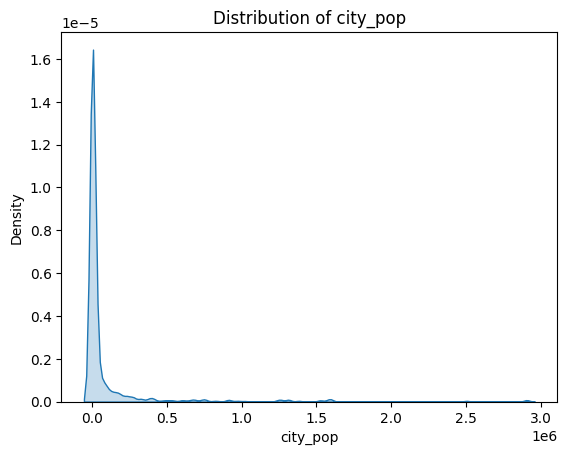

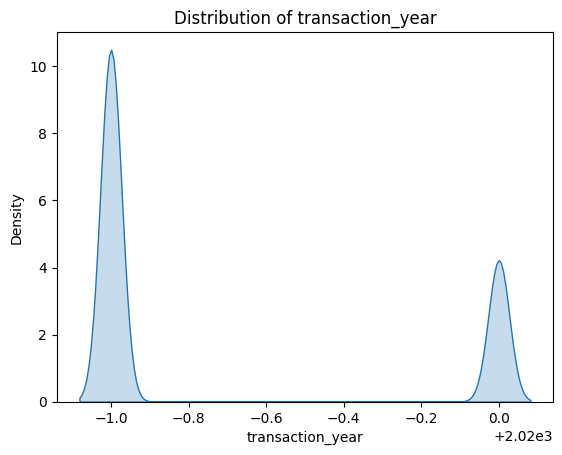

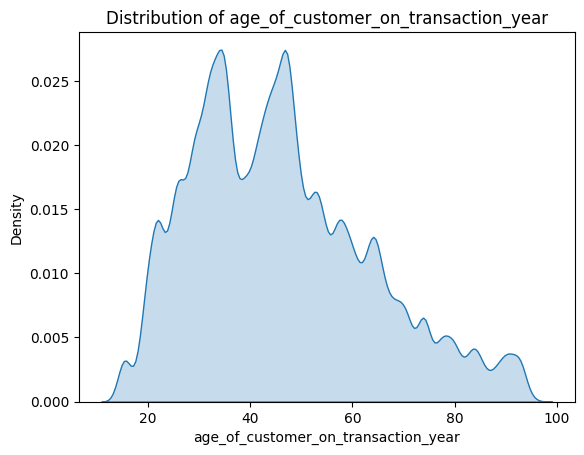

In [15]:
for col in continuous_cols:
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [16]:
print(df[continuous_cols].skew().sort_values())

age_of_customer_on_transaction_year     0.612262
transaction_year                        0.943062
city_pop                                5.593853
amt                                    42.277874
dtype: float64


**Removing Outlires using IQR method**

In [17]:
df['log_amt'] = np.log1p(df['amt'])

Text(0.5, 0, 'log_amt')

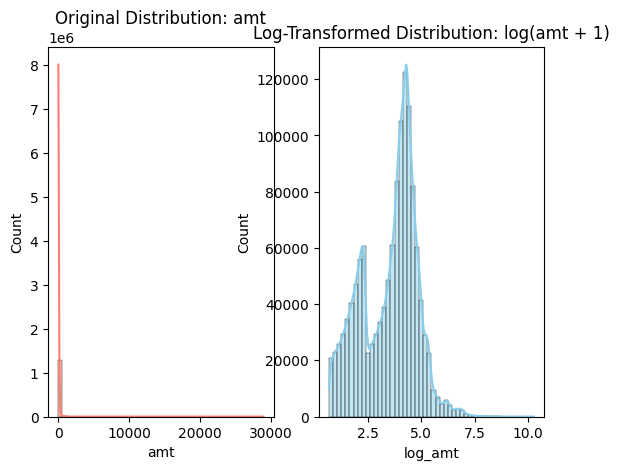

In [18]:
# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['amt'], bins=50, kde=True, color='salmon')
plt.title("Original Distribution: amt")
plt.xlabel("amt")

# Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['log_amt'], bins=50, kde=True, color='skyblue')
plt.title("Log-Transformed Distribution: log(amt + 1)")
plt.xlabel("log_amt")

In [19]:
df['city_pop_log'] = np.log1p(df['city_pop'])

Text(0.5, 0, 'city_pop_log')

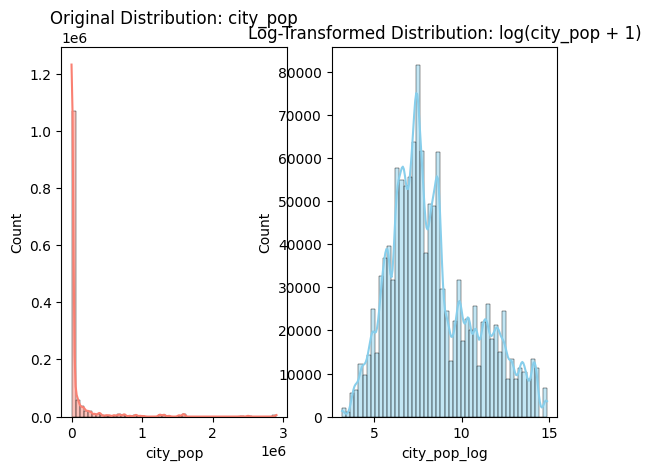

In [20]:
# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['city_pop'], bins=50, kde=True, color='salmon')
plt.title("Original Distribution: city_pop")
plt.xlabel("city_pop")

# Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['city_pop_log'], bins=50, kde=True, color='skyblue')
plt.title("Log-Transformed Distribution: log(city_pop + 1)")
plt.xlabel("city_pop_log")

In [21]:
cols = ['age_of_customer_on_transaction_year', 'transaction_year', 'city_pop_log', 'log_amt']

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply
df_cleaned = remove_outliers_iqr(df, cols)

print(f"Original: {df.shape[0]} rows")
print(f"After IQR Outlier Removal: {df_cleaned.shape[0]} rows")


Original: 1296675 rows
After IQR Outlier Removal: 1293601 rows


In [22]:
df_cleaned.columns

Index(['category', 'amt', 'gender', 'state', 'city_pop', 'job', 'is_fraud',
       'transaction_year', 'transaction_month',
       'age_of_customer_on_transaction_year', 'log_amt', 'city_pop_log'],
      dtype='object')

In [23]:
df = df_cleaned.drop(columns=['amt','city_pop'])
df.columns

Index(['category', 'gender', 'state', 'job', 'is_fraud', 'transaction_year',
       'transaction_month', 'age_of_customer_on_transaction_year', 'log_amt',
       'city_pop_log'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293601 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   category                             1293601 non-null  object 
 1   gender                               1293601 non-null  object 
 2   state                                1293601 non-null  object 
 3   job                                  1293601 non-null  object 
 4   is_fraud                             1293601 non-null  int64  
 5   transaction_year                     1293601 non-null  int32  
 6   transaction_month                    1293601 non-null  object 
 7   age_of_customer_on_transaction_year  1293601 non-null  int32  
 8   log_amt                              1293601 non-null  float64
 9   city_pop_log                         1293601 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 98.7+ MB


In [25]:
# Full job title list extracted from the image
job_titles = [
    "Psychologist, counselling", "Special educational needs teacher", "Nature conservation officer",
    "Patent attorney", "Dance movement psychotherapist", "Transport planner", "Arboriculturist",
    "Designer, multimedia", "Public affairs consultant", "Pathologist", "IT trainer", "Systems developer",
    "Engineer, land", "Systems analyst", "Naval architect", "Radiographer, diagnostic",
    "Programme researcher, broadcasting/film/video", "Energy engineer", "Event organiser",
    "Operational researcher", "Market researcher", "Probation officer", "Leisure centre manager",
    "Corporate investment banker", "Therapist, occupational", "Call centre manager", "Police officer",
    "Education officer, museum", "Physiotherapist", "Network engineer", "Forensic psychologist",
    "Geochemist", "Armed forces training and education officer", "Designer, furniture",
    "Optician, dispensing", "Psychologist, forensic", "Librarian, public", "Fine artist",
    "Scientist, research (maths)", "Research officer, trade union", "Tourism officer",
    "Human resources officer", "Surveyor, minerals", "Applications developer", "Video editor",
    "Curator", "Research officer, political party", "Engineer, mining", "Education officer, community",
    "Physicist, medical", "Amenity horticulturist", "Electrical engineer", "Television camera operator",
    "Higher education careers adviser", "Ambulance person", "Dealer", "Paediatric nurse",
    "Trading standards officer", "Engineer, technical sales", "Designer, jewellery", "Clinical biochemist",
    "Engineer, electronics", "Water engineer", "Science writer", "Film/video editor", "Solicitor, Scotland",
    "Product/process development scientist", "Tree surgeon", "Careers information officer",
    "Geologist, engineering", "Counsellor", "Freight forwarder", "Senior tax professional/tax inspector",
    "Engineer, broadcasting (operations)", "English as a second language teacher", "Economist",
    "Child psychotherapist", "Claims inspector/assessor", "Tourist information centre manager",
    "Exhibitions officer, museum/gallery", "Location manager", "Engineer, biomedical",
    "Research scientist (physical sciences)", "Purchasing manager", "Editor, magazine features",
    "Operations geologist", "Interpreter", "Engineering geologist", "Agricultural consultant",
    "Paramedic", "Financial adviser", "Administrator, education", "Educational psychologist",
    "Financial trader", "Audiological scientist", "Scientist, audiological",
    "Administrator, charities/voluntary organisations", "Health service manager", "Retail merchandiser",
    "Telecommunications researcher", "Exercise physiologist", "Accounting technician", "Product designer",
    "Waste management officer", "Mining engineer", "Surgeon", "Therapist, horticultural",
    "Environmental consultant", "Broadcast presenter", "Producer, radio", "Engineer, communications",
    "Historic buildings inspector/conservation officer", "Teacher, English as a foreign language",
    "Materials engineer", "Health visitor", "Medical secretary", "Theatre director", "Technical brewer",
    "Land/geomatics surveyor", "Engineer, structural", "Diagnostic radiographer",
    "Television production assistant", "Medical sales representative", "Building control surveyor",
    "Therapist, sports", "Structural engineer", "Commercial/residential surveyor", "Database administrator",
    "Exhibition designer", "Training and development officer", "Mechanical engineer", "Medical physicist",
    "Administrator", "Mudlogger", "Fisheries officer", "Conservator, museum/gallery",
    "Programmer, multimedia", "Cytogeneticist", "Multimedia programmer", "Counselling psychologist",
    "Chiropodist", "Teacher, early years/pre", "Cartographer", "Pensions consultant",
    "Primary school teacher", "Electronics engineer", "Museum/gallery exhibitions officer",
    "Air broker", "Chemical engineer", "Advertising account executive", "Advertising account planner",
    "Chartered legal executive (England and Wales)", "Psychiatric nurse", "Secondary school teacher",
    "Librarian, academic", "Embryologist, clinical", "Immunologist", "Television floor manager"
]

In [26]:
# Grouping dictionary
group_dict = {
    "Psychologists": [],
    "Teachers & Educators": [],
    "Healthcare Professionals": [],
    "Engineers": [],
    "Scientists & Researchers": [],
    "IT & Technology": [],
    "Design & Creative": [],
    "Legal & Law": [],
    "Managers & Administrators": [],
    "Finance & Business": [],
    "Art & Media": [],
    "Environment & Conservation": [],
    "Public Services": [],
    "Sales & Marketing": [],
    "Others": []
}

In [27]:
# Categorization logic based on exact phrasing
for title in job_titles:
    ltitle = title.lower()
    if "psychologist" in ltitle or "psychotherapist" in ltitle:
        group_dict["Psychologists"].append(title)
    elif "teacher" in ltitle or "lecturer" in ltitle or "education officer" in ltitle or "educational" in ltitle:
        group_dict["Teachers & Educators"].append(title)
    elif any(x in ltitle for x in ["nurse", "doctor", "radiographer", "therapist", "physiotherapist", "pathologist", "surgeon", "pharmacist", "paramedic", "audiological", "optician", "psychotherapist", "clinical"]):
        group_dict["Healthcare Professionals"].append(title)
    elif "engineer" in ltitle or "engineering" in ltitle:
        group_dict["Engineers"].append(title)
    elif "scientist" in ltitle or "research" in ltitle or "biochemist" in ltitle or "chemist" in ltitle or "physicist" in ltitle or "geologist" in ltitle or "ecologist" in ltitle:
        group_dict["Scientists & Researchers"].append(title)
    elif "developer" in ltitle or "programmer" in ltitle or "analyst" in ltitle or "database administrator" in ltitle or "network engineer" in ltitle or "IT" in ltitle:
        group_dict["IT & Technology"].append(title)
    elif "designer" in ltitle or "artist" in ltitle or "illustrator" in ltitle or "animator" in ltitle or "curator" in ltitle:
        group_dict["Design & Creative"].append(title)
    elif "solicitor" in ltitle or "attorney" in ltitle or "barrister" in ltitle or "legal" in ltitle:
        group_dict["Legal & Law"].append(title)
    elif "manager" in ltitle or "administrator" in ltitle or "officer" in ltitle or "coordinator" in ltitle:
        group_dict["Managers & Administrators"].append(title)
    elif "accountant" in ltitle or "financial" in ltitle or "investment" in ltitle or "finance" in ltitle or "economist" in ltitle or "trader" in ltitle:
        group_dict["Finance & Business"].append(title)
    elif "editor" in ltitle or "producer" in ltitle or "journalist" in ltitle or "broadcaster" in ltitle or "camera operator" in ltitle:
        group_dict["Art & Media"].append(title)
    elif "environment" in ltitle or "conservation" in ltitle or "horticulturist" in ltitle or "arboriculturist" in ltitle:
        group_dict["Environment & Conservation"].append(title)
    elif "police" in ltitle or "armed forces" in ltitle or "probation officer" in ltitle or "public affairs" in ltitle:
        group_dict["Public Services"].append(title)
    elif "marketing" in ltitle or "sales" in ltitle or "advertising" in ltitle or "merchandiser" in ltitle:
        group_dict["Sales & Marketing"].append(title)
    else:
        group_dict["Others"].append(title)

In [28]:
# Function to find the category
def get_group_description(title):
    for group_name, jobs in group_dict.items():
        if title in jobs:
            return group_name
    return "Others"

# Add the 'job_description' column based on group_dict mapping
df["job_description"] = df["job"].apply(get_group_description)

df.head(20)

,category,gender,state,job,is_fraud,transaction_year,transaction_month,age_of_customer_on_transaction_year,log_amt,city_pop_log,job_description
0,misc_net,F,NC,"Psychologist, counselling",0,2019,January,31,1.786747,8.159375,Psychologists
1,grocery_pos,F,WA,Special educational needs teacher,0,2019,January,41,4.684259,5.010635,Teachers & Educators
2,entertainment,M,ID,Nature conservation officer,0,2019,January,57,5.398660,8.332068,Managers & Administrators
3,gas_transport,M,MT,Patent attorney,0,2019,January,52,3.828641,7.570443,Legal & Law
4,misc_pos,M,VA,Dance movement psychotherapist,0,2019,January,33,3.760269,4.605170,Psychologists
5,gas_transport,F,PA,Transport planner,0,2019,January,58,4.560487,7.677400,Others
6,grocery_net,F,KS,Arboriculturist,0,2019,January,26,3.818591,7.898040,Environment & Conservation
7,gas_transport,M,VA,"Designer, multimedia",0,2019,January,72,4.285653,8.702676,Design & Creative
8,misc_pos,F,PA,Public affairs consultant,0,2019,January,78,1.662030,7.295056,Public Services
9,grocery_pos,F,TN,Pathologist,0,2019,January,45,5.295263,11.930227,Healthcare Professionals


In [29]:
df = df.drop(columns=['job'])

In [30]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to numbers
df['transaction_month'] = df['transaction_month'].map(month_to_number)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293601 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   category                             1293601 non-null  object 
 1   gender                               1293601 non-null  object 
 2   state                                1293601 non-null  object 
 3   is_fraud                             1293601 non-null  int64  
 4   transaction_year                     1293601 non-null  int32  
 5   transaction_month                    1293601 non-null  int64  
 6   age_of_customer_on_transaction_year  1293601 non-null  int32  
 7   log_amt                              1293601 non-null  float64
 8   city_pop_log                         1293601 non-null  float64
 9   job_description                      1293601 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 98.7+ MB


# -----------  ONE HOT ENCODING  -----------

In [32]:
# Separate features and target
target = df["is_fraud"]
features = df.drop("is_fraud", axis=1)

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=["object"]).columns
numerical_cols = features.drop(columns=categorical_cols)

# One-hot encode categorical columns and convert to int (0/1)
encoded_cats = pd.get_dummies(features[categorical_cols], drop_first=True).astype(int)

# Combine numerical + encoded
X_encoded = pd.concat([numerical_cols, encoded_cats], axis=1)

# add target back
df_final = pd.concat([X_encoded, target], axis=1)
print(df_final.head())

   transaction_year  transaction_month  age_of_customer_on_transaction_year  \
0              2019                  1                                   31   
1              2019                  1                                   41   
2              2019                  1                                   57   
3              2019                  1                                   52   
4              2019                  1                                   33   

    log_amt  city_pop_log  category_food_dining  category_gas_transport  \
0  1.786747      8.159375                     0                       0   
1  4.684259      5.010635                     0                       0   
2  5.398660      8.332068                     0                       0   
3  3.828641      7.570443                     0                       1   
4  3.760269      4.605170                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  ..

In [33]:
df_final.to_csv('credit_card_cleaned.csv',index=False)

In [34]:
df=pd.read_csv('credit_card_cleaned.csv')
df.head()

,transaction_year,transaction_month,age_of_customer_on_transaction_year,log_amt,city_pop_log,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,job_description_IT & Technology,job_description_Legal & Law,job_description_Managers & Administrators,job_description_Others,job_description_Psychologists,job_description_Public Services,job_description_Sales & Marketing,job_description_Scientists & Researchers,job_description_Teachers & Educators,is_fraud
0,2019,1,31,1.786747,8.159375,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2019,1,41,4.684259,5.010635,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2019,1,57,5.398660,8.332068,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2019,1,52,3.828641,7.570443,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2019,1,33,3.760269,4.605170,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
